In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import yfinance as yf
df=yf.download("AAPL",start='2019-01-01',end='2023-01-01')
print(df.head())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-01-02  38.722500  39.712502  38.557499  39.480000  38.047054  148158800
2019-01-03  35.994999  36.430000  35.500000  35.547501  34.257275  365248800
2019-01-04  36.132500  37.137501  35.950001  37.064999  35.719696  234428400
2019-01-07  37.174999  37.207500  36.474998  36.982498  35.640194  219111200
2019-01-08  37.389999  37.955002  37.130001  37.687500  36.319603  164101200


In [4]:
data=df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset=data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

958

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02684987],
       [0.        ],
       [0.010361  ],
       ...,
       [0.61785443],
       [0.64222927],
       [0.64441407]])

In [6]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02684987, 0.        , 0.010361  , 0.00979771, 0.01461125,
       0.01898096, 0.01981736, 0.01723989, 0.01333105, 0.01857132,
       0.02176325, 0.02333362, 0.02497227, 0.0189639 , 0.02002218,
       0.01793974, 0.02657676, 0.02408467, 0.02131943, 0.03936161,
       0.04139285, 0.04152941, 0.04960314, 0.05460441, 0.05470684,
       0.049074  , 0.04816933, 0.04649653, 0.04898865, 0.04777672,
       0.04883503, 0.04818639, 0.04905691, 0.05093454, 0.04927882,
       0.05253905, 0.05468976, 0.05486046, 0.05578219, 0.05284628,
       0.05595289, 0.05745499, 0.05690876, 0.05518478, 0.05173679,
       0.05243663, 0.06266108, 0.06609201, 0.06745755, 0.07090551,
       0.07498506, 0.07822822, 0.0756849 , 0.07846719, 0.09029614,
       0.08340019, 0.07945721, 0.07612869, 0.07899633, 0.07942306])]
[0.08152256805860375]

[array([0.02684987, 0.        , 0.010361  , 0.00979771, 0.01461125,
       0.01898096, 0.01981736, 0.01723989, 0.01333105, 0.01857132,
       0.02176325, 0.02333362, 0.02

In [9]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

898/898 [==============================] - 12s 11ms/step - loss: 0.0042


In [10]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 0s 16ms/step


C:\Users\yashk\AppData\Local\Temp\ipykernel_17852\3672404209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


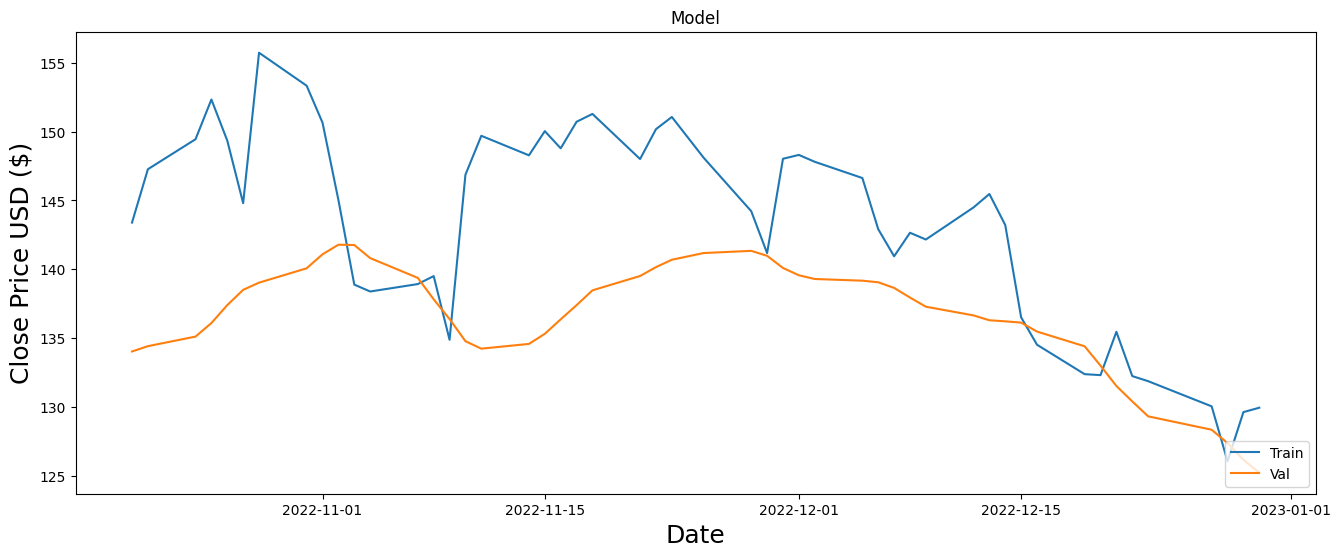

In [13]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [12]:
valid

Close  Predictions
Date                               
2022-10-20  143.389999   134.018967
2022-10-21  147.270004   134.405258
2022-10-24  149.449997   135.101517
2022-10-25  152.339996   136.086548
2022-10-26  149.350006   137.389526
2022-10-27  144.800003   138.500916
2022-10-28  155.740005   139.021591
2022-10-31  153.339996   140.067688
2022-11-01  150.649994   141.084808
2022-11-02  145.029999   141.781342
2022-11-03  138.880005   141.758362
2022-11-04  138.380005   140.809235
2022-11-07  138.919998   139.369888
2022-11-08  139.500000   137.812576
2022-11-09  134.869995   136.378296
2022-11-10  146.869995   134.767105
2022-11-11  149.699997   134.223541
2022-11-14  148.279999   134.569839
2022-11-15  150.039993   135.303741
2022-11-16  148.789993   136.356598
2022-11-17  150.720001   137.385468
2022-11-18  151.289993   138.464508
2022-11-21  148.009995   139.507355
2022-11-22  150.179993   140.151428
2022-11-23  151.070007   140.688721
2022-11-25  148.110001   141.175003
2022-11-28  144.220001   141.335815
2022-11-29  141.169998   140.973907
2022-11-30  148.029999   140.090363
2022-12-01  148.309998   139.560211
2022-12-02  147.809998   139.289352
2022-12-05  146.630005   139.166245
2022-12-06  142.910004   139.049850
2022-12-07  140.940002   138.640488
2022-12-08  142.649994   137.939438
2022-12-09  142.160004   137.273987
2022-12-12  144.490005   136.642273
2022-12-13  145.470001   136.288910
2022-12-14  143.210007   136.211121
2022-12-15  136.500000   136.116364
2022-12-16  134.509995   135.466370
2022-12-19  132.369995   134.395523
2022-12-20  132.300003   132.989960
2022-12-21  135.449997   131.510742
2022-12-22  132.229996   130.386383
2022-12-23  131.860001   129.303360
2022-12-27  130.029999   128.329071
2022-12-28  126.040001   127.356239
2022-12-29  129.610001   126.144035
2022-12-30  129.929993   125.204132